### 1. 머신러닝
#### 1-1. 시각화 포함 탐색적 자료분석(EDA)
#### 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.
#### 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.
#### 1-4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.
#### 1-5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.
#### 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해                 기술.

In [ ]:
import pandas as pd
df = pd.read_csv('data/student_data.csv')

'''
# https://archive.ics.uci.edu/ml/datasets/student+performance
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 paid(추가 유료 수업) - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
4 activities(교과 외 활동) - extra-curricular activities (binary: yes or no)
5 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
6 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
7 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
8 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
9 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
10 health - current health status (numeric: from 1 - very bad to 5 - very good)
11 absences - number of school absences (numeric: from 0 to 93)
12 G1 - first period grade (numeric: from 0 to 20)
13 G2 - second period grade (numeric: from 0 to 20)
14 GRADE - final grade (numeric: from 0 to 20, output target)
'''

ShapiroResult(statistic=0.9871252179145813, pvalue=0.001430215546861291)


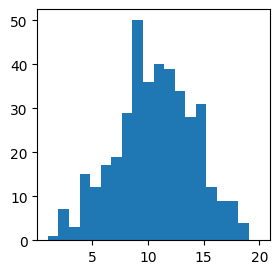

In [8]:
# 1-1. EDA
# 1) 데이터 타입 설명
#df.info()
#df.head()
# 변수는 총 14개이며, 이중 object 타입은 4개, float64 타입은 7개, int64 타입은 3개이다.
# 종속변수는 grade이고 연속형이며, grade외 나머지 변수들은 예상 독립변수들이다.
# 2) 종속변수 분포 설명
df['grade'].value_counts()
import matplotlib.pyplot as plt
grade_hist = df['grade']
grade_hist.sort_values()
fig, axs = plt.subplots(1,1, figsize = (3,3))
plt.hist(grade_hist, bins = 20, range = [1,20], density = False)
# 히스토그램상 정규분포를 이루는 것으로 보이지만, shapiro 검정을 통해 확실히 해보자.
from scipy.stats import shapiro
print(shapiro(grade_hist))
# shapiro 검정을 해본 결과, 정규분포를 따르지 않는다.

<AxesSubplot:>

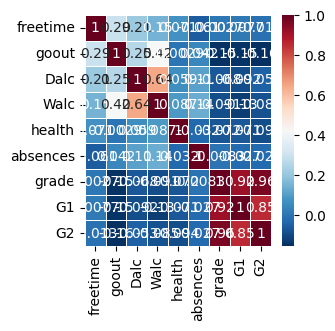

In [13]:
# 3) 독립변수 간 상관관계, 독립변수와 종속변수 간 상관관계
import seaborn as sns
fig, axs = plt.subplots(1,1, figsize = (3,3))
df_temp = df.drop(['school', 'sex', 'paid','activities','famrel'], axis = 1 ).corr(method = 'pearson')
sns.heatmap(df_temp
            , xticklabels=df_temp.columns
            , yticklabels=df_temp.columns
            , cmap = 'RdBu_r'
            , annot = True
            , linewidth = 0.5)
# 연속형 변수들의 pearson 상관관계 결과는 아래와 같다.
# 독립변수 간에는 G1,G2가 0.85이므로 상관성이 매우 높아 보인다. 즉 첫 번째 시험점수와 두 번째 시험점수는 연관성이 높다.
# 독립변수와 종속변수간의 연관성은 Grade와 G1, G2가 0.92, 0.96이므로 확실히 높다.


<BarContainer object of 2 artists>

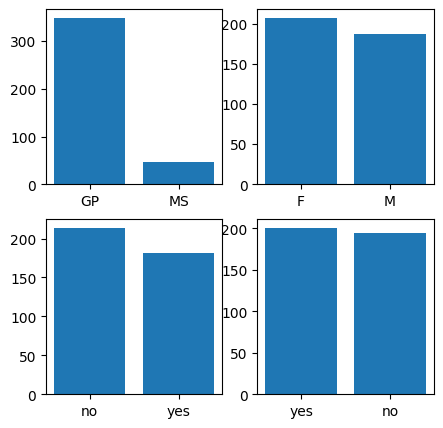

In [5]:
# 4) 범주형 변수 시각화
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize = (5,5))
axs[0][0].bar(df['school'].value_counts().index, df['school'].value_counts().values)
axs[0][1].bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
axs[1][0].bar(df['paid'].value_counts().index, df['paid'].value_counts().values)
axs[1][1].bar(df['activities'].value_counts().index, df['activities'].value_counts().values)
# 범주형 변수중 school의 경우 불균형이 보인다.

<AxesSubplot:>

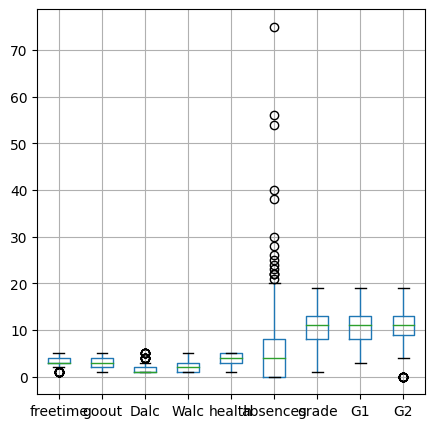

In [14]:
# 5) 이상치 확인
fig, axs = plt.subplots(1,1, figsize = (5,5))
df_temp = df.drop(['school', 'sex', 'paid','activities','famrel'], axis = 1 )
df_temp.boxplot()
# freetime, Dalc, absences, G2 변수내 이상치가 있다.
# svm은 이상치에 민감하기 때문에 추후 scale 변환이 필요할 수 있다.

In [83]:
# 6) 적합 가능한 모델 확인
# 종속변수가 연속형이기 때문에 분류보다는 회귀가 적합하다.

In [15]:
# 1-2. 결측치 식별, 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.
# 1) 결측치 식별
#df.info()
df.isnull().sum()
df[df.isnull().any(axis = 1)]
# famrel, freetime, goout, Dalc, Walc, health, absences 변수내 결측치들이 존재한다. 
# 전체 결측치는 19개로 전체 데이터 중 1% 안되는 수치이다.
# 2) 결측치를 식별, 예측하는 방법 2가지 > 여기서 예측은 '대치'이다.
# 결측치를 대치하는 방법중에는 단순대치법과 K-NN을 활용한 대치법이 있다.
# 단순대치법은 연속형인 경우, 각 변수의 평균 혹은 중앙값으로 대치하며, 범주형인 경우 각 변수의 최빈값으로 대치한다.
# K-NN은 최근접 이웃 알고리즘을 통해 결측치를 대치하며, 연속형만 결측치 대치가 가능하다.
# 해당 데이터셋에는 한 행이 모두 결측치인 경우가 없으므로 삭제보다는 대치를 진행하였으며,
# 해당 데이터셋의 결측치는 연속형 변수만 결측치가 존재하므로 K-NN을 사용하였다.
# K-NN은 단순하기 때문에 알고리즘 구현이 쉬우며, 훈련 데이터를 그대로 가지고 있어
# 특별한 훈련을 하지 않기 때문에, 훈련 단계 속도가 매우 빠른 장점을 지닌다.

from sklearn.impute import KNNImputer
df_missing = df[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences' ]]
ki = KNNImputer(n_neighbors = 5)
ki_fit_transform = ki.fit_transform(df_missing)
df_kit_fit_transform = pd.DataFrame(ki_fit_transform, columns = df_missing.columns)
df[df_missing.columns] = df_kit_fit_transform
df[df.isnull().any(axis = 1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2


In [85]:
# 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.
# 범주형 변수는 'school', 'sex', 'paid', 'activities' 이며, one-hot encoding 변환을 했다.
# one-hot encoding을 진행한 이유는 추후 머신러닝 모델 적합시, 수치형 변수만 적합할 수 있기 때문이다.
# 추가적으로 drop_first = True로 지정하여, 첫 번째 카테고리 값을 사용하지 않았다.
# 나머지는 연속형 변수라고 판단되어 one-hot encoding을 진행하지 않았다.
df = pd.get_dummies(df, columns = ['school', 'sex', 'paid', 'activities' ], drop_first = True)
df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12,1,1,0,0


In [87]:
# 1-4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.
# 랜덤분할과 층화추출방법이 있다.
# 랜덤분할은 사용자가 임의로 train, test 데이터로 분할하는 방법이다.
# 층화추출방법은 종속변수 내 클래스 비율에 맞게 train, test 데이터를 분할하는 방법이다. 클래스의 편향을 낮출 수 있으며, 분류분석시 사용한다.
# 해당 데이터셋은 종속변수가 연속형이기 때문에 랜덤분할을 진행하였으며, train, Test데이터로 분할하는 이유는
# 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다.
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['grade'])
y = df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023 )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 13) (276,)
(119, 13) (119,)


In [88]:
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.
# 모두 분류/회귀 분석이 가능한 알고리즘이다
# 모두 범주형 변수를 연속형 변수로 변환이 필요하다
# 모두 회귀분석의 다중공선성 문제를 해결할 수 있다.
# SVM은 커널트릭을 통해 xgboost, randomforest는 트리모델을 통해 다중공선성을 해결한다.
# 해당 데이터셋의 종속변수는 연속형이기 때문에 회귀분석을 실시해야 되며, 3가지 알고리즘 모두 적합하다.

In [168]:
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해 기술.
# 1) SVM 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

svr = SVR()
param_grid = {'C' : [0.1,1,10,100], 'gamma' : [0.001, 0.01, 0.1, 1, 10]}
model = GridSearchCV(svr, param_grid, cv = 5) # cv : 교차검증
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# metrics
print('train_score : ', model.score(X_train_scaled, y_train)) # 결정계수값은 0.7 ~ 0.8을 목표치로 설정.
print('test_score : ', model.score(X_test_scaled, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# best_hyperparameter
print('best_estimator_ : ', model.best_estimator_)
df_params = pd.DataFrame(model.cv_results_['params'])
df_params['mean_test_score'] = pd.DataFrame(model.cv_results_['mean_test_score'])
df_params.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
df_params.reset_index(drop = True, inplace = True)
df_params.head()

train_score :  0.964853048430954
test_score :  0.9546611955864519
RMSE :  0.855100390383122
best_estimator_ :  SVR(C=100, gamma=0.001)


,C,gamma,mean_test_score
0,100.0,0.001,0.960918
1,10.0,0.010,0.958672
2,100.0,0.010,0.950790
3,10.0,0.001,0.942825
4,1.0,0.010,0.927746


train_score :  0.9846879427560252
test_score :  0.9714250022111662
RMSE :  0.6788521153752017
best_estimator_ :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
   max_depth  n_estimators  mean_test_score
0          2           100         0.957435
1          2           200         0.955484
2          4           100         0.952499
3          4          

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

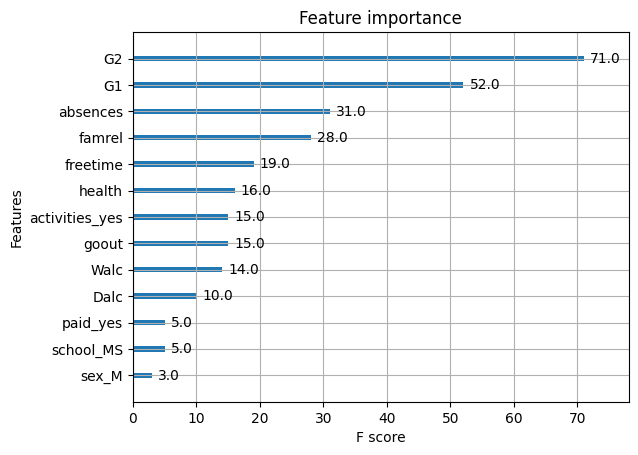

In [169]:
# 2) xgboost
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

xgb = XGBRegressor() # n-estimators = 1000
param_grid = {'n_estimators' : [100,200], 'max_depth' : [2,4]  }
model = GridSearchCV(xgb, param_grid, cv = 5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# metrics
print('train_score : ', model.score(X_train_scaled, y_train))
print('test_score : ', model.score(X_test_scaled, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# best_hyperparameter
print('best_estimator_ : ', model.best_estimator_)
df_params = pd.DataFrame(model.cv_results_['params'])
df_params['mean_test_score'] = pd.DataFrame(model.cv_results_['mean_test_score'])
df_params.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
df_params.reset_index(drop = True, inplace = True)
print(df_params.head())

# feature_importance 확인
xgb = XGBRegressor(n_estimators  = 100, max_depth = 2 )
xgb.fit(X_train_scaled, y_train)
plot_importance(xgb)

train_score :  0.9840879789398894
test_score :  0.9677102419764079
RMSE :  0.7216298147503416
best_estimator_ :  RandomForestRegressor(max_depth=10, min_samples_split=8)
   max_depth  min_samples_split  mean_test_score
0         10                  8         0.954846
1         10                  6         0.953663
2         10                 10         0.953643
3          8                  8         0.953590
4         10                  2         0.953361


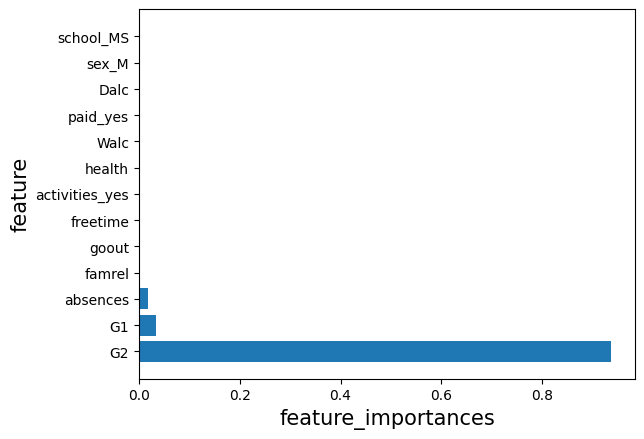

In [170]:
# 3) RandomForest
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor()
param_grid = {'max_depth' : [2,4,6,8,10], 'min_samples_split' : [2,4,6,8,10]}
model = GridSearchCV(rf, param_grid, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print('train_score : ', model.score(X_train, y_train))
print('test_score : ', model.score(X_test, y_test))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

# best_hyperparameter
print('best_estimator_ : ', model.best_estimator_)
df_params = pd.DataFrame(model.cv_results_['params'])

df_params['mean_test_score'] = pd.DataFrame(model.cv_results_['mean_test_score'])
df_params.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
df_params.reset_index(drop = True, inplace = True)
print(df_params.head())


# feature_importance 확인
rf = RandomForestRegressor(max_depth  = df_params['max_depth'][0], min_samples_split = df_params['min_samples_split'][0])
rf.fit(X_train, y_train)
# np.mean([tree.feature_importances_ for tree in rf.estimators_], axis = 0) # 행방향으로 압축, 총 13개로 변수의 각각 평균으로 압축
feature_importances = pd.DataFrame(np.mean([tree.feature_importances_ 
                                            for tree in rf.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), feature_importances], axis = 1)
feature_importances.columns = ['var_name', 'var_value']
feature_importances = feature_importances.sort_values(['var_value']
                                                      , ascending = False).reset_index(drop = True)

import matplotlib.pyplot as plt
plt.barh(feature_importances['var_name'], feature_importances['var_value'], align = 'center')
plt.xlabel('feature_importances', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

In [171]:
# SVM, XGBoost, RandomForest 모두 디테일하게 매개변수(하이퍼파라미터)를 찾아 적용시켰다.
# RMSE 기준으로 XGBoost가 0.67로 가장 낮다. 예측력이 좋기 때문에 가장 적합한 알고리즘으로 선택하였다.
# XGBoost 분석결과 G1, G2가 최종성적에 매우 영향을 끼치는 변수로 나오지만
# G1, G2는 grade와 상관성이 매우 높은 변수이기 때문에 이 둘을 제외하고는 absences가 가장 영향을 미치는 변수라고 볼 수있다.
# 현업에서는 변수 정확도만 보고 변수를 선택하는 것을 주의해야 한다.
# 각 모델의 주 변수로 G1, G2를 사용할 수 있지만, 성적이기 때문에 분석을 통해 성적에 영향을 미치는 변수를 찾기에는 어려워 보인다.
# 머신러닝은 어떠한 독립변수를 선택하느냐에 따라 결정되는 해석이 완전히 달라질 수 있따.
# 만약 학생의 성적에 영향을 미치는 변수를 찾고 싶다면 성적과 밀접한 관련이 있는 변수를 추가해야 한다.
# 그러면 모델의 정확성뿐만 아니라 의미있는 분석이 될 것이 될 것이라 생각한다. 

In [1]:
# 2. 통계분석
# 연속형 독립변수 여러개의 소규모 데이터. (총 29점 )변수명은 순서대로 x1~x10, 의미는 없는 데이터
# 1-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오
# 1-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산
# 1-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산
# 2-1. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)
# 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요.
# 3. ANOVA분석 (9점)
# 변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)
# 이원분산분석을 수행하고 통계표를 작성하시오.¶
# 기출 : 생존과 요금, 나이에 대해 이원분산분석을 수행하라
# 예제 : AveragePrice에 대해 type, region을 바탕으로 이원분산분석을 수행하라

In [17]:
#1-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오
import pandas as pd
import numpy as np 
#!pip3 install mglearn
import mglearn
X,y = mglearn.datasets.load_extended_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('결정계수 : ', model.score(X_test, y_test))
print('RMSE : ' , np.sqrt(mean_squared_error(y_test, y_pred)))

# train_test_split으로 8:2
# sklearn.linear_model 활용 및 20% 테스트셋으로 모델을 검증
# 결정계수는 : 88%
# RMSE : 실제값과 예측값이 평균 3.3차이

결정계수 :  0.8878933898695749
RMSE :  3.332758528471223


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [20]:
# 1-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산
import pandas as pd
import numpy as np 
#!pip3 install mglearn
import mglearn
X,y = mglearn.datasets.load_extended_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.arange(0.1, 1, 0.1)}
model = GridSearchCV(Ridge(), param_grid)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print('Best alpha : ', model.best_estimator_)
print('결정계수 : ', lr.score(X_test, y_test))
print('RMSE : ' , np.sqrt(mean_squared_error(y_test, y_pred)))

# train_test_split으로 8:2
# sklearn.linear_model 활용 및 20% 테스트셋으로 모델을 검증
# alpha 값을 조정하여 모델의 학습 정도를 조절
# GridSearchCV을 통해 0.1~1까지 탐색하여 0.1일 때 결정계수가 가장 높다.
# 결정계수는 : 88%
# RMSE : 실제값과 예측값이 평균 3.25차이

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

Best alpha :  Ridge(alpha=0.1)
결정계수 :  0.8878933898695749
RMSE :  3.2357786918599785


In [21]:
# 1-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

import pandas as pd
import numpy as np 
#!pip3 install mglearn
import mglearn
X,y = mglearn.datasets.load_extended_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.arange(0.1, 1, 0.1)}
model = GridSearchCV(Lasso(), param_grid)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print('Best alpha : ', model.best_estimator_)
print('결정계수 : ', lr.score(X_test, y_test))
print('RMSE : ' , np.sqrt(mean_squared_error(y_test, y_pred)))

# train_test_split으로 8:2
# sklearn.linear_model 활용 및 20% 테스트셋으로 모델을 검증
# alpha 값을 조정하여 모델의 학습 정도를 조절
# GridSearchCV을 통해 0.1~1까지 탐색하여 0.1일 때 결정계수가 가장 높다.
# 결정계수는 : 88%
# RMSE : 실제값과 예측값이 평균 4.94차이

Best alpha :  Lasso(alpha=0.1)
결정계수 :  0.8878933898695749
RMSE :  4.941064634415313


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [ ]:
np.linspace(-3,3,100, endpoint = False).reshape(-1,1) # 

절편 :  [1.98824431]
회귀계수 :  [[2.03757318 1.01904343 2.99556137]]


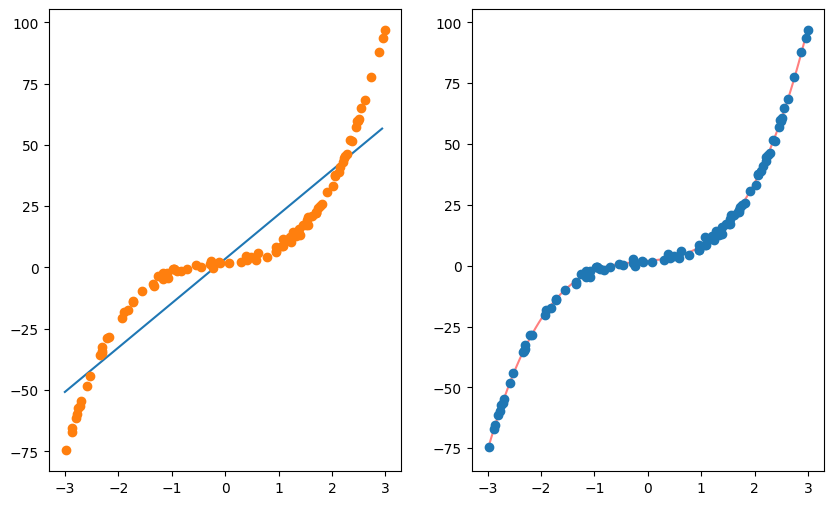

In [33]:
# 2-1. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)
# 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

m = 100
# np.random.randint(6) # 0 ~ 5까지 랜덤한 숫자 1개
# np.random.rand(3,2) # 0 ~ 1 의 균일분포 표준정규분포 난수 matrix array(m,n) 생성
# np.random.randn(3,2) # 평균 0, 분산 1 가우시안 표준정규분포 난수 matrix array(m,n) 생성 
X = 6*np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  # 3차항, 노이즈 포함

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1) # reshape(-1, 2) > 열을 2열 정렬 하고 나온 행수로 지정
fig, axs = plt.subplots(1,2, figsize = (10,6))

axs[0].plot(line, model.predict(line))
axs[0].plot(X[:,0], y, 'o')


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly.fit_transform(X)
line_poly = poly.transform(line)


model = LinearRegression()
model.fit(X_poly, y)
line_poly_pred = model.predict(line_poly)

axs[1].plot(line, line_poly_pred, c = 'r', alpha = 0.5 )
axs[1].plot(X[:,0], y, 'o')

print('절편 : ' , model.intercept_)
print('회귀계수 : ' , model.coef_)

                       df     sum_sq    mean_sq           F         PR(>F)
C(type)               1.0  56.111007  56.111007  828.218296  1.989417e-133
C(region)             2.0   0.432136   0.216068    3.189242   4.161918e-02
C(type):C(region)     2.0   1.878817   0.939409   13.866003   1.146622e-06
Residual           1008.0  68.291047   0.067749         NaN            NaN


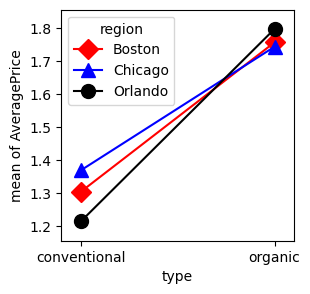

In [16]:
# 3. ANOVA분석 (9점)
# 변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)
# 이원분산분석을 수행하고 통계표를 작성하시오.¶
# 기출 : 생존과 요금, 나이에 대해 이원분산분석을 수행하라
# 예제 : AveragePrice에 대해 type, region을 바탕으로 이원분산분석을 수행하라

import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 1. 독립변수, 종속변수 Series로 변경
df = pd.read_csv('data/avocado.csv')
df = df[ (df['region']=='Orlando') | (df['region']=='Boston' )
        | (df['region']=='Chicago') ].reset_index(drop=True)
s_average = df['AveragePrice']
s_type = df['type']
s_region = df['region']

# 2. 모델 적합
formula = 'AveragePrice ~ C(type)*C(region)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, type = 2)
print(aov_table)

# 3. 상호작용 그래프
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (3,3))
fig = interaction_plot(s_type, s_region, s_average, colors = ['red', 'blue', 'black']
                       , markers = ['D', '^', 'o'], ms = 10, ax = axs)

In [37]:
# 분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A, B의 영향을 알아보기 위해 사용되는 검증 방법이다.
# 가설은 아래와 같이 세울 수 있다.
# 상호작용효과 검정에 대한 가설
# > 귀무가설 : region과 avocado type 간에는 상호작용 효과가 없다.
# > 대립가설 : region과 avocado type 간에는 상호작용 효과가 있다. 즉 region이 average price 미치는 영향은 type 수준에 따라 달라진다.
# 주효과 검정에 대한 가설
# > 귀무가설 : region 종류에 따른 average price 차이는 존재하지 않는다.
# > 대립가설 : region 종류에 따른 average price 차이는 존재한다.
# > 귀무가설 : type 종류에 따른 average price 차이는 존재하지 않는다.
# > 대립가설 : type 종류에 따른 average price 차이는 존재한다.
# 상호작용에 대한 검정 결과는 C(type):C(region) 행의 p-value 값을 보고 판단할 수 있다.
# 유의수준 0.05 하에서 귀무가설을 기각할 수 있으며 유의수준 0.05 하에서 상호작용효과가 있다고 할 수 있다.
# 즉, 즉 region이 average price 미치는 영향은 type 수준에 따라 달라진다.
# 상호작용효과가 있으므로, 주효과 검정은 무의미 하지만, 
# 주효과 검정도 모두 유의수준 0.05하에서 유의하므로 각 변수의 종류에 따른 average price의 차이가 있다고 할 수 있다.
# 더 직관적으로 판단하기위해 상호작용 그래프로 해당 모델을 표현하였다.
# 통계표에서 보았던 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다.
# 특히 orlando에서는 다른 지역보다 conventional 대비 orgainc의 선호도가 높음을 알 수 있다.